In [1]:
import torch
import torchvision.datasets as datasets
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import time

In [2]:
cd semantic_segmentation_pytorch

/home/mehdi2277/Documents/HarveyMuddWork/Neural_Nets_Research/gan_image_metrics/semantic_segmentation_pytorch


In [3]:
from test import setup_test, get_last_hidden
model = setup_test()

Loading weights for net_encoder
Loading weights for net_decoder


In [4]:
cd ..

/home/mehdi2277/Documents/HarveyMuddWork/Neural_Nets_Research/gan_image_metrics


In [5]:
train_dataset = datasets.MNIST("mnist", train=True, download=True)

In [6]:
import subprocess

def get_gpu_memory_map():
    result = subprocess.check_output(
        [
            'nvidia-smi', '--query-gpu=memory.used',
            '--format=csv,nounits,noheader'
        ], encoding='utf-8')
    # Convert lines into a dictionary
    gpu_memory = [int(x) for x in result.strip().split('\n')]
    gpu_memory_map = dict(zip(range(len(gpu_memory)), gpu_memory))
    print("Memory: ", gpu_memory_map[0])
    return gpu_memory_map

In [7]:
print(get_gpu_memory_map())

Memory:  884
{0: 884, 1: 12, 2: 12, 3: 12}


In [8]:
results = []
batch_size = 16
with torch.no_grad():
    for batch in range(len(train_dataset) // batch_size):
#         print("Batch: ", batch)
        if not batch % 10:
            print("Batch:", batch)
        imgs = []
        for i in range(batch_size):
            img = np.array(train_dataset[batch * batch_size + i][0])
            img = torch.FloatTensor(img)
            img = img.cuda()
            imgs.append(img)
            del img
        full_batch = torch.stack(imgs)
        del imgs
        full_batch = full_batch.unsqueeze(1)
        full_batch = full_batch.expand(batch_size, 3, 28, 28)
        result = get_last_hidden(model, full_batch)
        del full_batch
        results.append(result)
#         get_gpu_memory_map()
print("done")

Batch: 0
Batch: 10
Batch: 20
Batch: 30
Batch: 40
Batch: 50
Batch: 60
Batch: 70
Batch: 80
Batch: 90
Batch: 100
Batch: 110
Batch: 120
Batch: 130
Batch: 140
Batch: 150
Batch: 160
Batch: 170
Batch: 180
Batch: 190
Batch: 200
Batch: 210
Batch: 220
Batch: 230
Batch: 240
Batch: 250
Batch: 260
Batch: 270
Batch: 280
Batch: 290
Batch: 300
Batch: 310
Batch: 320
Batch: 330
Batch: 340
Batch: 350
Batch: 360
Batch: 370
Batch: 380
Batch: 390
Batch: 400
Batch: 410
Batch: 420
Batch: 430
Batch: 440
Batch: 450
Batch: 460
Batch: 470
Batch: 480
Batch: 490
Batch: 500
Batch: 510
Batch: 520
Batch: 530
Batch: 540
Batch: 550
Batch: 560
Batch: 570
Batch: 580
Batch: 590
Batch: 600
Batch: 610
Batch: 620
Batch: 630
Batch: 640
Batch: 650
Batch: 660
Batch: 670
Batch: 680
Batch: 690
Batch: 700
Batch: 710
Batch: 720
Batch: 730
Batch: 740
Batch: 750
Batch: 760
Batch: 770
Batch: 780
Batch: 790
Batch: 800
Batch: 810
Batch: 820
Batch: 830
Batch: 840
Batch: 850
Batch: 860
Batch: 870
Batch: 880
Batch: 890
Batch: 900
Batch: 910

In [10]:
# ALL IN RESULTS REAL
results_real = results
results = results_real[:300]

In [11]:
min_dist = float('inf')
dists = []
filename = "distances.txt"
print("Total batches:", len(results))
with open(filename, 'w') as f:
    for batch in range(len(results)):
        start = time.time()
        if not batch % 10:
            print("Batch: ", batch)
        for row in range(batch_size):
            first_img = results[batch][row].cpu().data.numpy()
            for other_batch in range(batch, len(results)):
                other_start = 0
                if batch == other_batch:
                    other_start = row + 1
                for other_row in range(other_start, batch_size):
                    second_img = results[other_batch][other_row].cpu().data.numpy()
                    dist = np.sum((first_img - second_img) ** 2)
                    min_dist = min(dist, min_dist)
                    dists.append(dist)
                    f.write(str(dist) + ",")
        end = time.time()
        print("Batch time:", end - start)
                    
                    

Total batches: 300
Batch:  0
Batch time: 4.292099237442017
Batch time: 4.225083589553833
Batch time: 4.2066261768341064
Batch time: 4.203869342803955
Batch time: 4.176433086395264
Batch time: 4.162458896636963
Batch time: 4.14261794090271
Batch time: 4.1463682651519775
Batch time: 4.130954027175903
Batch time: 4.118487358093262
Batch:  10
Batch time: 4.089687824249268
Batch time: 4.084805250167847
Batch time: 4.067788362503052
Batch time: 4.089504718780518
Batch time: 4.036745309829712
Batch time: 4.026944398880005
Batch time: 4.005101680755615
Batch time: 3.995706081390381
Batch time: 3.9747262001037598
Batch time: 3.9667727947235107
Batch:  20
Batch time: 3.948392152786255
Batch time: 3.9502789974212646
Batch time: 3.922011137008667
Batch time: 3.9182965755462646
Batch time: 3.905388593673706
Batch time: 3.892496109008789
Batch time: 3.8613357543945312
Batch time: 3.8640477657318115
Batch time: 3.8409204483032227
Batch time: 3.829240560531616
Batch:  30
Batch time: 3.803861379623413


Batch time: 0.5877010822296143
Batch time: 0.5727849006652832
Batch:  260
Batch time: 0.5588810443878174
Batch time: 0.5436670780181885
Batch time: 0.5309178829193115
Batch time: 0.5170135498046875
Batch time: 0.5018749237060547
Batch time: 0.48870110511779785
Batch time: 0.47314882278442383
Batch time: 0.45802831649780273
Batch time: 0.44580841064453125
Batch time: 0.43161678314208984
Batch:  270
Batch time: 0.41950345039367676
Batch time: 0.4031546115875244
Batch time: 0.38934803009033203
Batch time: 0.37579345703125
Batch time: 0.36127519607543945
Batch time: 0.3464481830596924
Batch time: 0.33316540718078613
Batch time: 0.31902456283569336
Batch time: 0.30493950843811035
Batch time: 0.2901725769042969
Batch:  280
Batch time: 0.27706170082092285
Batch time: 0.2621467113494873
Batch time: 0.24849510192871094
Batch time: 0.2342219352722168
Batch time: 0.21934008598327637
Batch time: 0.20497703552246094
Batch time: 0.19151020050048828
Batch time: 0.177656888961792
Batch time: 0.1628451

In [12]:
print(min_dist)

0.0027550275


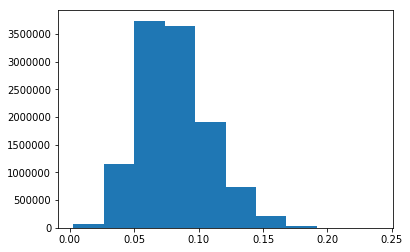

In [13]:
plt.hist(dists)
plt.show()